In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
housing_data = pd.read_csv('five_years_data.csv')

In [3]:
housing_data.head()

,Unnamed: 0,period_begin,period_end,city,state,property_type_id,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,...,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code
0,5,2024-04-01,2024-04-30,Holiday Lakes,Texas,-1,56000.0,119900.0,58.577406,178.422619,...,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000,"Houston, TX",26420
1,12,2024-05-01,2024-05-31,Krugerville,Texas,-1,712000.0,675000.0,232.662252,246.702890,...,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000,"Dallas, TX",19124
2,25,2024-07-01,2024-07-31,Alice,Texas,-1,148000.0,165000.0,103.496503,107.415902,...,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333,"Alice, TX",10860
3,47,2021-04-01,2021-04-30,Alice,Texas,-1,252000.0,149000.0,106.554703,79.824561,...,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500,"Alice, TX",10860
4,83,2022-11-01,2022-11-30,Watauga,Texas,-1,284000.0,299900.0,199.408470,188.335358,...,22.0,19.0,33.0,1.8,39.0,0.984357,0.222222,0.272727,"Fort Worth, TX",23104


In [4]:
housing_data = housing_data.drop(columns=["Unnamed: 0", 'property_type_id','parent_metro_region', 'parent_metro_region_metro_code'])
housing_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks
0,2024-04-01,2024-04-30,Holiday Lakes,Texas,56000.0,119900.0,58.577406,178.422619,1.0,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000
1,2024-05-01,2024-05-31,Krugerville,Texas,712000.0,675000.0,232.662252,246.702890,6.0,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000
2,2024-07-01,2024-07-31,Alice,Texas,148000.0,165000.0,103.496503,107.415902,11.0,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333
3,2021-04-01,2021-04-30,Alice,Texas,252000.0,149000.0,106.554703,79.824561,6.0,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500
4,2022-11-01,2022-11-30,Watauga,Texas,284000.0,299900.0,199.408470,188.335358,18.0,22.0,19.0,33.0,1.8,39.0,0.984357,0.222222,0.272727


In [5]:
# SOURCE: https://simplemaps.com/data/us-cities 
cities_population = pd.read_csv("uscities.csv")

# filter North Carolina, Virginia and Texas 
cities_population = cities_population[cities_population['state_name'].isin(['North Carolina', 'Texas', 'Virginia'])]
# Fetch only city, state_name and population columns 
cities_population = cities_population[['city', 'population', 'state_name']]
cities_population.head()

,city,population,state_name
4,Houston,6046392,Texas
5,Dallas,5843632,Texas
25,San Antonio,2069843,Texas
27,Austin,1915031,Texas
39,Charlotte,1436613,North Carolina


In [6]:
# mergind the populaiton datafram into the housind data (addinng us cities cesnus data to the housing data file)
housing_data = pd.merge(housing_data, cities_population, how='left', left_on=['city', 'state'], right_on=['city', 'state_name'])
housing_data = housing_data.drop(columns=['state_name'])

housing_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
0,2024-04-01,2024-04-30,Holiday Lakes,Texas,56000.0,119900.0,58.577406,178.422619,1.0,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000,853.0
1,2024-05-01,2024-05-31,Krugerville,Texas,712000.0,675000.0,232.662252,246.702890,6.0,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000,1929.0
2,2024-07-01,2024-07-31,Alice,Texas,148000.0,165000.0,103.496503,107.415902,11.0,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333,17797.0
3,2021-04-01,2021-04-30,Alice,Texas,252000.0,149000.0,106.554703,79.824561,6.0,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500,17797.0
4,2022-11-01,2022-11-30,Watauga,Texas,284000.0,299900.0,199.408470,188.335358,18.0,22.0,19.0,33.0,1.8,39.0,0.984357,0.222222,0.272727,23336.0


In [7]:
# filter Texas data based on cities population size in descending order to know the largest city based on population size 
texas_data = housing_data[housing_data['state']=='Texas']
texas_data = texas_data.sort_values(by='population', ascending=False)
texas_data.to_csv("texas_data.csv", index=False)
texas_data.head(1)

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
181246,2024-07-01,2024-07-31,Houston,Texas,159000.0,340000.0,150.397082,181.523283,170.0,185.0,270.0,1074.0,6.3,57.0,0.954549,0.052941,0.124324,6046392.0


In [8]:
# Filter Houston TX data (largest population)
huston_TX = texas_data[texas_data['city']=='Houston']
huston_TX.to_csv("huston_TX_data.csv", index=False)
huston_TX.head(1)

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
181246,2024-07-01,2024-07-31,Houston,Texas,159000.0,340000.0,150.397082,181.523283,170.0,185.0,270.0,1074.0,6.3,57.0,0.954549,0.052941,0.124324,6046392.0


In [9]:
print(f"number of rows for Huston data is: {len(huston_TX)}")

number of rows for Huston data is: 300


In [10]:
# Filter the North Carlolina cities population in descending order
NC_data = housing_data[housing_data['state']=='North Carolina']
NC_data = NC_data.sort_values(by='population', ascending=False)
NC_data.to_csv("NC_data.csv", index=False)
NC_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
218957,2024-12-01,2024-12-31,Charlotte,North Carolina,389820.0,395000.0,228.108644,230.832646,174.0,NaN,147.0,561.0,3.2,52.0,0.983007,0.126437,0.200000,1436613.0
237945,2023-02-01,2023-02-28,Charlotte,North Carolina,560000.0,399900.0,286.298569,225.218023,3.0,NaN,4.0,10.0,3.3,18.0,1.023028,0.666667,0.400000,1436613.0
76811,2024-07-01,2024-07-31,Charlotte,North Carolina,405000.0,400000.0,237.651187,240.014793,204.0,NaN,249.0,609.0,3.0,39.0,0.989842,0.191176,0.424779,1436613.0
209000,2021-03-01,2021-03-31,Charlotte,North Carolina,304500.0,330000.0,169.445628,189.646064,272.0,NaN,293.0,518.0,1.9,35.0,1.010810,0.466912,0.655844,1436613.0
47730,2024-03-01,2024-03-31,Charlotte,North Carolina,335500.0,420000.0,330.619974,246.101937,136.0,NaN,172.0,304.0,2.2,34.0,0.986313,0.279412,0.553191,1436613.0


In [11]:
# Filter out the largest city in North Carolina 
charlotte_data = NC_data[NC_data['city']=='Charlotte']
charlotte_data.to_csv("Charlotte_data.csv", index=False)
charlotte_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
218957,2024-12-01,2024-12-31,Charlotte,North Carolina,389820.0,395000.0,228.108644,230.832646,174.0,NaN,147.0,561.0,3.2,52.0,0.983007,0.126437,0.200000,1436613.0
237945,2023-02-01,2023-02-28,Charlotte,North Carolina,560000.0,399900.0,286.298569,225.218023,3.0,NaN,4.0,10.0,3.3,18.0,1.023028,0.666667,0.400000,1436613.0
76811,2024-07-01,2024-07-31,Charlotte,North Carolina,405000.0,400000.0,237.651187,240.014793,204.0,NaN,249.0,609.0,3.0,39.0,0.989842,0.191176,0.424779,1436613.0
209000,2021-03-01,2021-03-31,Charlotte,North Carolina,304500.0,330000.0,169.445628,189.646064,272.0,NaN,293.0,518.0,1.9,35.0,1.010810,0.466912,0.655844,1436613.0
47730,2024-03-01,2024-03-31,Charlotte,North Carolina,335500.0,420000.0,330.619974,246.101937,136.0,NaN,172.0,304.0,2.2,34.0,0.986313,0.279412,0.553191,1436613.0


In [12]:
print(f'The number of rows in charlotte data is: {(len(charlotte_data))}')

The number of rows in charlotte data is: 299


In [13]:
# Filtering Virginia data based on cities population in decsending order 
virginia_data = housing_data[housing_data['state']=='Virginia'] 
virginia_data = virginia_data.sort_values(by='population', ascending=False)
virginia_data.to_csv("virginia_data.csv", index=False)
virginia_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
69892,2023-02-01,2023-02-28,Virginia Beach,Virginia,316500.0,349000.0,174.167269,210.382413,2.0,NaN,1.0,1.0,0.5,18.0,0.996368,0.500000,NaN,1431821.0
92740,2022-04-01,2022-04-30,Virginia Beach,Virginia,420000.0,345000.0,218.750000,201.950523,383.0,466.0,522.0,374.0,1.0,12.0,1.035801,0.697128,0.832618,1431821.0
165447,2020-03-01,2020-03-31,Virginia Beach,Virginia,185000.0,299000.0,137.199198,165.923331,124.0,158.0,132.0,185.0,1.5,25.0,0.991678,0.306452,0.613924,1431821.0
107552,2020-03-01,2020-03-31,Virginia Beach,Virginia,318950.0,299000.0,164.904892,165.923331,416.0,526.0,554.0,836.0,2.0,28.0,0.993213,0.250000,0.631179,1431821.0
118684,2021-08-01,2021-08-31,Virginia Beach,Virginia,325000.0,319000.0,184.601665,184.226044,941.0,1026.0,925.0,993.0,1.1,20.0,1.014474,0.573858,0.718324,1431821.0


In [14]:
virginia_beach_data = virginia_data[virginia_data['city']=='Virginia Beach']
virginia_beach_data.to_csv("virginia_beach_data.csv", index=False)
virginia_beach_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
69892,2023-02-01,2023-02-28,Virginia Beach,Virginia,316500.0,349000.0,174.167269,210.382413,2.0,NaN,1.0,1.0,0.5,18.0,0.996368,0.500000,NaN,1431821.0
92740,2022-04-01,2022-04-30,Virginia Beach,Virginia,420000.0,345000.0,218.750000,201.950523,383.0,466.0,522.0,374.0,1.0,12.0,1.035801,0.697128,0.832618,1431821.0
165447,2020-03-01,2020-03-31,Virginia Beach,Virginia,185000.0,299000.0,137.199198,165.923331,124.0,158.0,132.0,185.0,1.5,25.0,0.991678,0.306452,0.613924,1431821.0
107552,2020-03-01,2020-03-31,Virginia Beach,Virginia,318950.0,299000.0,164.904892,165.923331,416.0,526.0,554.0,836.0,2.0,28.0,0.993213,0.250000,0.631179,1431821.0
118684,2021-08-01,2021-08-31,Virginia Beach,Virginia,325000.0,319000.0,184.601665,184.226044,941.0,1026.0,925.0,993.0,1.1,20.0,1.014474,0.573858,0.718324,1431821.0


In [15]:
print(f'Number of rows in Virginia Beach data are: {(len(virginia_beach_data))}')

Number of rows in Virginia Beach data are: 291


### Analyzing Charlotte's overtime house market trend


In [16]:
# drop city and state columns
charlotte_data = charlotte_data.drop(columns=['city', 'state'])

In [17]:
charlotte_data.isna().mean() * 100


period_begin                 0.0
period_end                   0.0
median_sale_price            0.0
median_list_price            0.0
median_ppsf                  0.0
median_list_ppsf             0.0
homes_sold                   0.0
pending_sales              100.0
new_listings                 0.0
inventory                    0.0
months_of_supply             0.0
median_dom                   0.0
avg_sale_to_list             0.0
sold_above_list              0.0
off_market_in_two_weeks      0.0
population                   0.0
dtype: float64

In [18]:
# drop columns that has 100 missing values 
charlotte_data = charlotte_data.drop(columns=['pending_sales'])


In [19]:
# Optimizind the data types for each columns 
charlotte_data.dtypes

period_begin                object
period_end                  object
median_sale_price          float64
median_list_price          float64
median_ppsf                float64
median_list_ppsf           float64
homes_sold                 float64
new_listings               float64
inventory                  float64
months_of_supply           float64
median_dom                 float64
avg_sale_to_list           float64
sold_above_list            float64
off_market_in_two_weeks    float64
population                 float64
dtype: object

In [20]:
# converting date columns 
charlotte_data['period_begin']=pd.to_datetime(charlotte_data['period_begin'])
charlotte_data['period_end']=pd.to_datetime(charlotte_data['period_end'])

In [21]:
# converting numeric columns to optimize memory usage 
float_cols = ['median_sale_price', 'median_list_price', 'median_ppsf', 
              'median_list_ppsf', 'months_of_supply', 'avg_sale_to_list', 
              'sold_above_list', 'off_market_in_two_weeks']
charlotte_data[float_cols] = charlotte_data[float_cols].astype('float32')
                                            

In [22]:
int_cols = ['homes_sold', 'new_listings', 'inventory', 
            'median_dom', 'population']
charlotte_data[int_cols]=charlotte_data[int_cols].astype('int32')

In [23]:
charlotte_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 218957 to 191512
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   period_begin             299 non-null    datetime64[ns]
 1   period_end               299 non-null    datetime64[ns]
 2   median_sale_price        299 non-null    float32       
 3   median_list_price        299 non-null    float32       
 4   median_ppsf              299 non-null    float32       
 5   median_list_ppsf         299 non-null    float32       
 6   homes_sold               299 non-null    int32         
 7   new_listings             299 non-null    int32         
 8   inventory                299 non-null    int32         
 9   months_of_supply         299 non-null    float32       
 10  median_dom               299 non-null    int32         
 11  avg_sale_to_list         299 non-null    float32       
 12  sold_above_list          299 non-

#### price trend overtime

In [24]:
# working from the copy of the dataframe
charlotte_data_copy = charlotte_data.copy()

In [25]:
charlotte_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 218957 to 191512
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   period_begin             299 non-null    datetime64[ns]
 1   period_end               299 non-null    datetime64[ns]
 2   median_sale_price        299 non-null    float32       
 3   median_list_price        299 non-null    float32       
 4   median_ppsf              299 non-null    float32       
 5   median_list_ppsf         299 non-null    float32       
 6   homes_sold               299 non-null    int32         
 7   new_listings             299 non-null    int32         
 8   inventory                299 non-null    int32         
 9   months_of_supply         299 non-null    float32       
 10  median_dom               299 non-null    int32         
 11  avg_sale_to_list         299 non-null    float32       
 12  sold_above_list          299 non-

In [26]:
# extract the year from the period_begin tabe 
charlotte_data_copy['year'] = charlotte_data_copy['period_begin'].dt.year
yearly_avg = charlotte_data_copy.groupby('year').agg(
    median_sale_price=('median_sale_price', 'mean'),
    median_ppsf=('median_ppsf', 'median'), inventory=('inventory', 'mean')
).reset_index()
yearly_avg.head()

,year,median_sale_price,median_ppsf,inventory
0,2020,272626.53125,156.256012,1228.728814
1,2021,326185.15625,191.241013,901.766667
2,2022,380727.96875,223.813797,777.200000
3,2023,393108.40625,231.474213,755.266667
4,2024,426767.09375,242.654297,981.833333


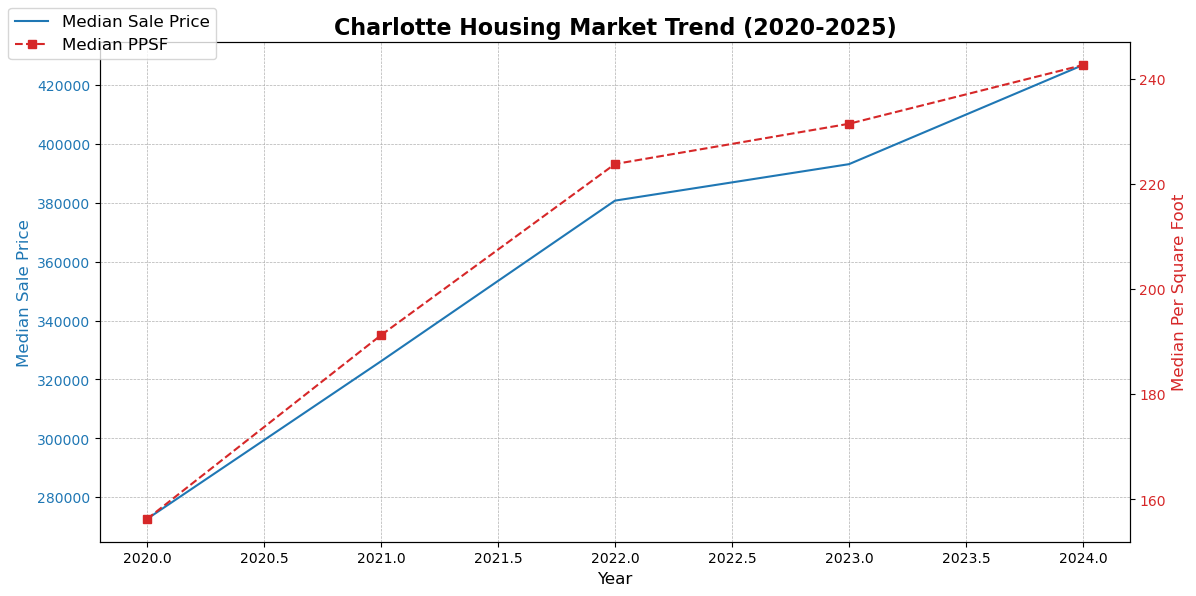

In [27]:
fig, ax1 = plt.subplots(figsize=(12,6))
# Plot median sale price on the first y-axis
ax1.set_title('Charlotte Housing Market Trend (2020-2025)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Median Sale Price', color='tab:blue', fontsize=12)
ax1.plot(yearly_avg['year'], yearly_avg['median_sale_price'], label='Median Sale Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the median PPSF
ax2 = ax1.twinx()
ax2.set_ylabel('Median Per Square Foot', color='tab:red', fontsize=12)
ax2.plot(yearly_avg['year'], yearly_avg['median_ppsf'], label='Median PPSF', color='tab:red', marker='s', linestyle='--', markersize=6)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=10)
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

fig.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig('charlotte_housing_Market_2020_25.png')
plt.show()

$Analysis:$
- Charlotte Housing Market Surge (2020-2025): Median Sale Price Soars from Below 280K to Over 420K

In [28]:
# Grouping listing price, sale price and inventory coulmns by year
charlotte_data_copy['year'] = charlotte_data_copy['period_begin'].dt.year
yearly_average = charlotte_data_copy.groupby('year').agg(
    listing_price=('median_list_price', 'mean'),
    sale_price=('median_sale_price', 'mean'), 
    inventory =('inventory', 'mean')
).reset_index()
yearly_average.head()

,year,listing_price,sale_price,inventory
0,2020,291759.18750,272626.53125,1228.728814
1,2021,339648.03125,326185.15625,901.766667
2,2022,384997.50000,380727.96875,777.200000
3,2023,403750.00000,393108.40625,755.266667
4,2024,417080.62500,426767.09375,981.833333


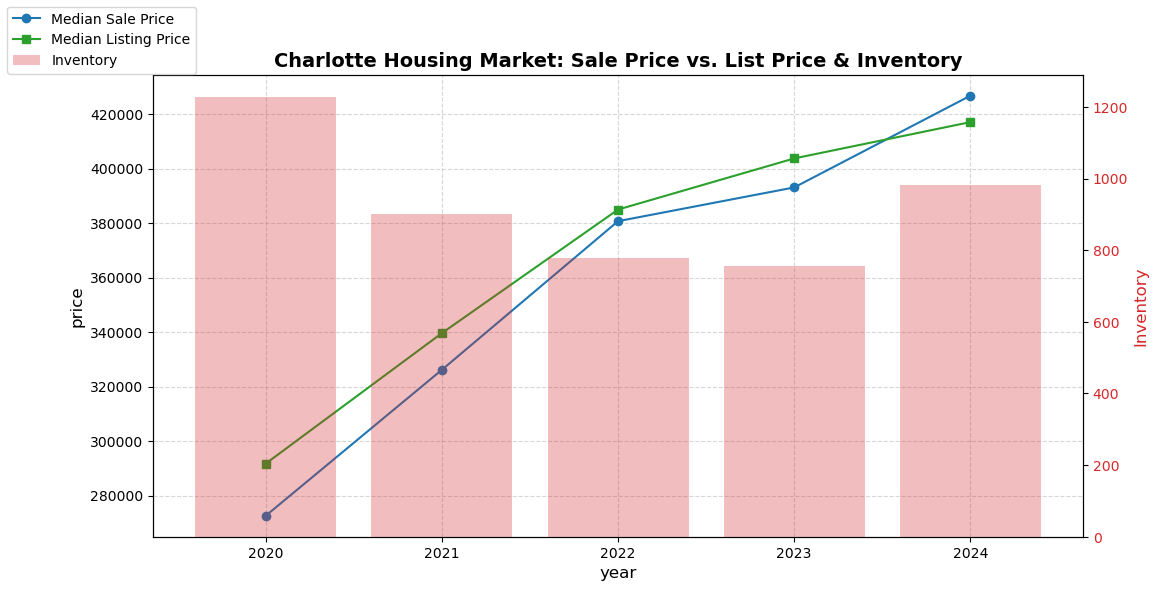

In [29]:
# Drawing line charge to compare the listing and sale pricea as well as the inventory over the last five year 

fig, ax1 = plt.subplots(figsize=(12,6))
# plotting list and sale price 
ax1.set_xlabel('year', fontsize=12)
ax1.set_ylabel('price', fontsize=12)
ax1.plot(yearly_average['year'], yearly_average['sale_price'], 
         label='Median Sale Price', color='tab:blue', marker="o")
ax1.plot(yearly_average['year'], yearly_average['listing_price'], 
         label='Median Listing Price', color='tab:green', marker='s')

# plot the second y axis 
ax2 = ax1.twinx()
ax2.set_ylabel('Inventory', color='tab:red', fontsize=12)
ax2.bar(yearly_average['year'], yearly_average['inventory'], 
        color='tab:red', alpha=0.3, label='Inventory')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Charlotte Housing Market: Sale Price vs. List Price & Inventory", fontsize=14, fontweight='bold')
fig.legend(loc='upper left', fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [30]:
# Convert 'period_begin' to datetime for each city
charlotte_data['period_begin'] = pd.to_datetime(charlotte_data['period_begin'], errors='coerce')
huston_TX['period_begin'] = pd.to_datetime(huston_TX['period_begin'], errors='coerce')
virginia_beach_data['period_begin'] = pd.to_datetime(virginia_beach_data['period_begin'], errors='coerce')

# Drop rows with invalid dates
charlotte_data = charlotte_data[charlotte_data['period_begin'].notna()]
huston_TX = huston_TX[huston_TX['period_begin'].notna()]
virginia_beach_data = virginia_beach_data[virginia_beach_data['period_begin'].notna()]

# Extract the year from 'period_begin' for each city
charlotte_data['year'] = charlotte_data['period_begin'].dt.year
huston_TX['year'] = huston_TX['period_begin'].dt.year
virginia_beach_data['year'] = virginia_beach_data['period_begin'].dt.year

# Aggregate the data by year and rename columns for each city
charlotte_agg = charlotte_data.groupby('year').agg({
    'median_sale_price': 'mean',
    'median_ppsf': 'mean',
    'inventory': 'sum'
}).reset_index().rename(columns={
    'median_sale_price': 'charlotte_sale_price',
    'median_ppsf': 'charlotte_ppsf',
    'inventory': 'charlotte_inventory'
})

houston_agg = huston_TX.groupby('year').agg({
    'median_sale_price': 'mean',
    'median_ppsf': 'mean',
    'inventory': 'sum'
}).reset_index().rename(columns={
    'median_sale_price': 'houston_sale_price',
    'median_ppsf': 'houston_ppsf',
    'inventory': 'houston_inventory'
})

virginia_beach_agg = virginia_beach_data.groupby('year').agg({
    'median_sale_price': 'mean',
    'median_ppsf': 'mean',
    'inventory': 'sum'
}).reset_index().rename(columns={
    'median_sale_price': 'virginia_beach_sale_price',
    'median_ppsf': 'virginia_beach_ppsf',
    'inventory': 'virginia_beach_inventory'
})

# Merge the aggregated data for all cities
merged_city_data = charlotte_agg.merge(houston_agg, on='year', how='outer')
merged_city_data = merged_city_data.merge(virginia_beach_agg, on='year', how='outer')

# Display the first few rows of the merged data
merged_city_data.head()


C:\Users\Jcroc\AppData\Local\Temp\ipykernel_30536\2943267292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huston_TX['period_begin'] = pd.to_datetime(huston_TX['period_begin'], errors='coerce')
C:\Users\Jcroc\AppData\Local\Temp\ipykernel_30536\2943267292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virginia_beach_data['period_begin'] = pd.to_datetime(virginia_beach_data['period_begin'], errors='coerce')


,year,charlotte_sale_price,charlotte_ppsf,charlotte_inventory,houston_sale_price,houston_ppsf,houston_inventory,virginia_beach_sale_price,virginia_beach_ppsf,virginia_beach_inventory
0,2020,272626.53125,166.797623,72495,252925.025000,135.559494,180306.0,287821.059322,169.623699,27830.0
1,2021,326185.15625,199.530548,54106,286295.816667,153.239496,139568.0,341752.500000,187.008320,19626.0
2,2022,380727.96875,231.725647,46632,308355.075000,167.274235,125456.0,351352.864407,208.476483,15876.0
3,2023,393108.40625,238.749329,45316,309670.083333,171.956629,135732.0,412520.118182,225.667012,14588.0
4,2024,426767.09375,257.400299,58910,328160.000000,176.847848,169810.0,407627.293103,237.328852,16762.0


In [31]:
merged_city_data.to_csv("listing_sale_inve_4_CLT_HU_VA.csv")

In [32]:
plt.style.use('ggplot')  # Set the style for cleaner plots

# Median Sale Price Trends as a Line Chart (Charlotte, Houston, Virginia Beach)

## Key Findings:

1. **Overall Price Growth**  
   - All three cities exhibit an upward trend in median sale prices over the last four years. 

2. **Charlotte Market**  
   - Charlotte shows consistent price growth each year with no leveling off or down years.

3. **Virginia Beach Market**  
   - Virginia Beach experienced a sharp increase in median sale prices, then shows a decrease between from 2023 to 2024, this is specific to this market 
    -relative to the other two markets.

4. **Houston Market**  
   - Houston’s home prices have showed consistant increases but at a slower pace compared to Charlotte and Virginia Beach.

5. **Comparisons**  
   - Houston remains the most affordable market of the three.  
   - Charlotte and Virginia Beach saw more aggressive price growth.  
   - Virginia Beach initially had the highest median sale price but was eventually overtaken by Charlotte when it began to decline in 2023.

### Conclusion:
All markets have shown an upwards trend in median price over the same time period. Houston is the most affordable market with only moderate increase in price. Charlotte has become the most expensive market passing Virginia Beach due to that markets recent decline.


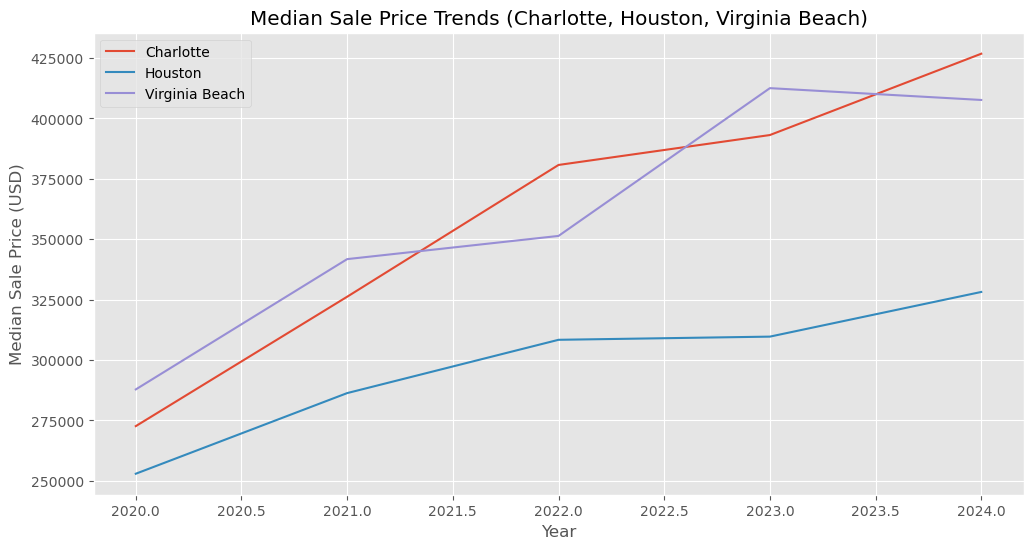

In [33]:
# 1. Median Sale Price Trends via line chart
plt.figure(figsize=(12, 6))
plt.plot(merged_city_data['year'], merged_city_data['charlotte_sale_price'], label='Charlotte')
plt.plot(merged_city_data['year'], merged_city_data['houston_sale_price'], label='Houston')
plt.plot(merged_city_data['year'], merged_city_data['virginia_beach_sale_price'], label='Virginia Beach')
plt.title('Median Sale Price Trends (Charlotte, Houston, Virginia Beach)')
plt.xlabel('Year')
plt.ylabel('Median Sale Price (USD)')
plt.legend()
plt.show()

# Median Price per Square Foot Trends as a Line Chart (Charlotte, Houston, Virginia Beach)

## Key Findings:

1. **Overall Price Growth Across All Cities**  
   - The median price per square foot has increased steadily from 2020 to 2024 in all three cities.

2. **Charlotte Market**  
   - Charlotte shows the highest increase in price per square foot.

3. **Virginia Beach Market**  
   - Virginia Beach has a very consistant upward trend that does not seem to be affected by the overall decrease in median price observed in the previous chart.

4. **Houston Market**  
   - Houston has shown an increase over the same time period like the other two markets however much like median price it is the most affordable of the three.

5. **Comparisons**  
   - Charlotte has the most increase of any market in cost per square foot.
   - Virginia Beach has followed a smilar trend to Charlotte but is slightly less expensive.
   - Houston is the most affordable market in terms of price per square foot.

### Conclusion:
All markets have increased over the same timeframe with Charlotte and Virginia Beach seeing similar increases while Huston has only shown moderate increases and is the market where you can get the most space for your money.


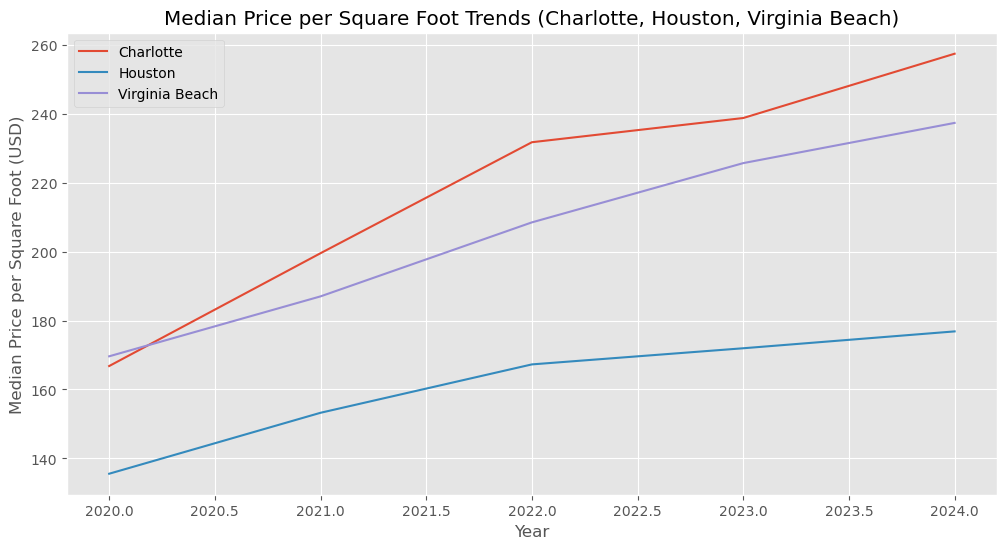

In [34]:
# 2. Median Price per Square Foot Trends via line chart
plt.figure(figsize=(12, 6))
plt.plot(merged_city_data['year'], merged_city_data['charlotte_ppsf'], label='Charlotte')
plt.plot(merged_city_data['year'], merged_city_data['houston_ppsf'], label='Houston')
plt.plot(merged_city_data['year'], merged_city_data['virginia_beach_ppsf'], label='Virginia Beach')
plt.title('Median Price per Square Foot Trends (Charlotte, Houston, Virginia Beach)')
plt.xlabel('Year')
plt.ylabel('Median Price per Square Foot (USD)')
plt.legend()
plt.show()

# Inventory Trends as a Line Chart (Charlotte, Houston, Virginia Beach)

## Key Findings:

1. **Charlotte’s Decline in Inventory**  
   - Charlotte shows a consistent decrease in inventory units likely playing a role in it having the highest median price as a result of supply and demand.

2. **Houston’s Steady Decline**  
   - Houston's inventory also declines over time, however it has the largest amount of inventory. This higher supply aligns with the lowest median price inverse to Charlotte.

3. **Virginia Beach’s Slow Decrease**  
   - Virginia Beach experiences the slowest rate of decline in inventory levels, but the lowest total inventory.

4. **Comparisons**  
   - Charlotte's inventory has the steepest decline, while Houston and Virginia Beach both experience moderate drops.  

### Conclusion:
Charlotte experiences the most significant inventory reduction, but all markets have had a decline in inventory over the observed timeframe.


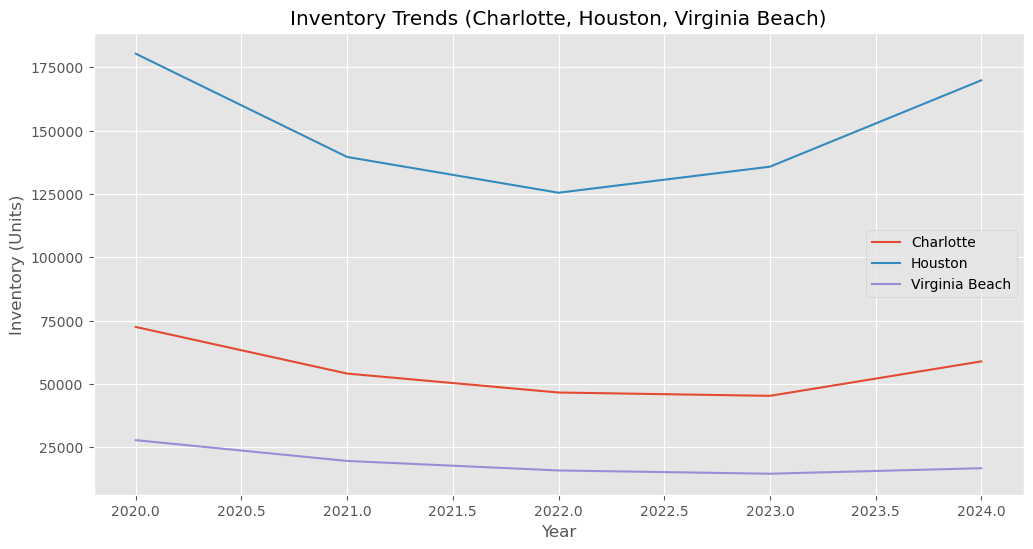

In [35]:
# 3. Inventory Trends via line chart
plt.figure(figsize=(12, 6))
plt.plot(merged_city_data['year'], merged_city_data['charlotte_inventory'], label='Charlotte')
plt.plot(merged_city_data['year'], merged_city_data['houston_inventory'], label='Houston')
plt.plot(merged_city_data['year'], merged_city_data['virginia_beach_inventory'], label='Virginia Beach')
plt.title('Inventory Trends (Charlotte, Houston, Virginia Beach)')
plt.xlabel('Year')
plt.ylabel('Inventory (Units)')
plt.legend()
plt.show()

# Distribution of Median Price per Square Foot by City as a Box Plot

## Key Findings:

1. **Charlotte Market**  
   - The distribution shows that Charlotte has the highest median price per square foot, with a mean of **218.84 USD**.
   - The interquartile range suggests variability, but prices still outpace the other markets analyzed.

2. **Houston Market**  
   - Houston has the lowest median price per square foot among the three cities, with a mean of **160.98 USD**.
   - The distribution is condensed, indicating lower variability in prices.

3. **Virginia Beach Market**  
   - Virginia Beach has a mean price per square foot of **205.62 USD**.
   - Its distribution falls inbetween the other two markets having more variation than Houston but less than Charlotte.

4. **Comparisons**  
   - Charlotte has the highest prices and the widest range, indicating some properties are likely to appreciate.
   - Houston remains the most affordable market with lower variation.
   - Virginia Beach shows a stable market with only some variability.

### Conclusion:
Charlotte leads in price per square foot, followed by Virginia Beach, while Houston remains the most affordable.

C:\Users\Jcroc\AppData\Local\Temp\ipykernel_30536\1579523248.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(


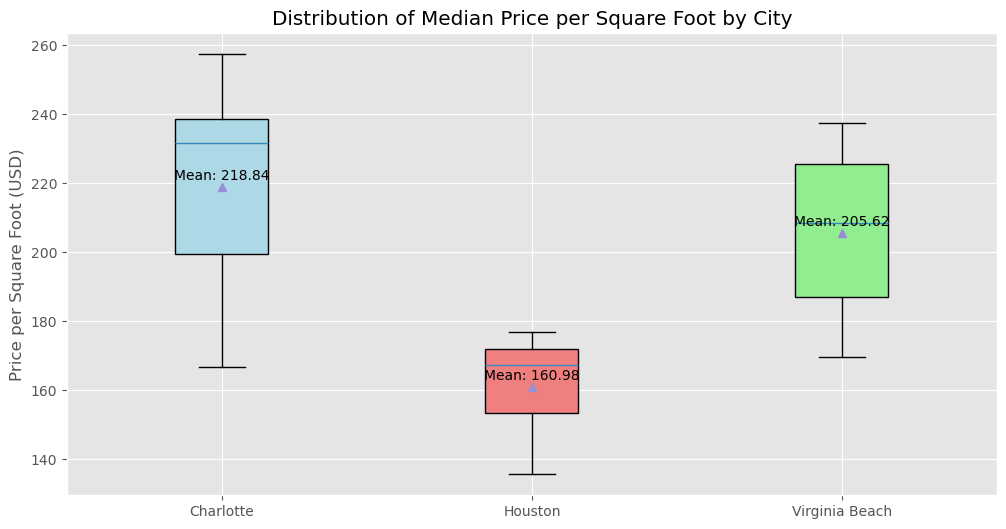

In [36]:
# Set Fig Size
plt.figure(figsize=(12, 6))

# Box Plot for Median Price per Square Foot by City
boxplot = plt.boxplot(
    [merged_city_data['charlotte_ppsf'].dropna(), merged_city_data['houston_ppsf'].dropna(), merged_city_data['virginia_beach_ppsf'].dropna()],
    labels=['Charlotte', 'Houston', 'Virginia Beach'],
    patch_artist=True,  # Enable custom colors
    showmeans=True  # Show the mean as a point
)

# Customizing colors
colors = ['lightblue', 'lightcoral', 'lightgreen']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Titles and labels
plt.title('Distribution of Median Price per Square Foot by City')
plt.ylabel('Price per Square Foot (USD)')

# Adding annotations for mean values
mean_values = [
    merged_city_data['charlotte_ppsf'].mean(),
    merged_city_data['houston_ppsf'].mean(),
    merged_city_data['virginia_beach_ppsf'].mean()
]

for i, mean in enumerate(mean_values, start=1):
    plt.text(i, mean + 2, f'Mean: {mean:.2f}', fontsize=10, color='black', ha='center')

plt.show()

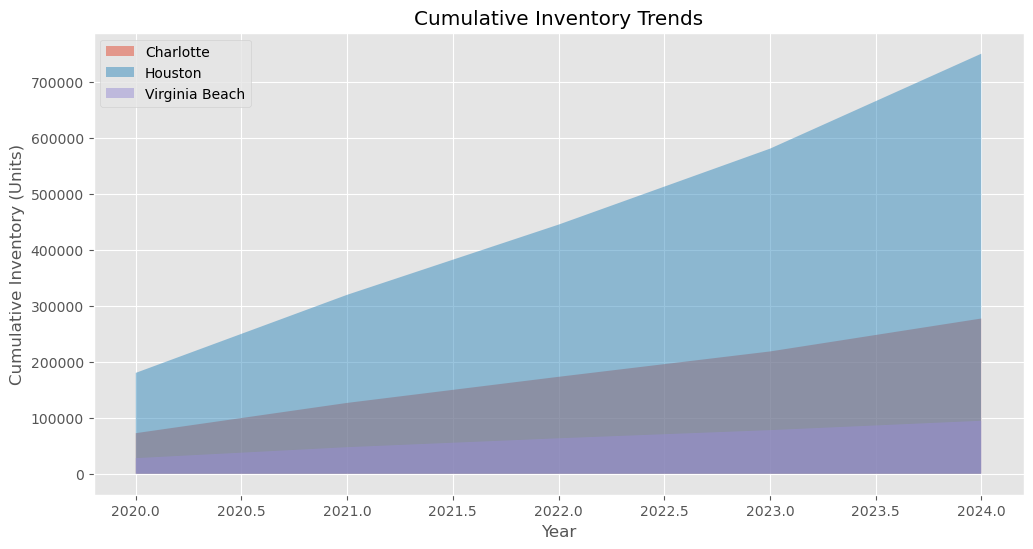

In [37]:
#cumulative area chart to show relative inventory growth/decline
plt.figure(figsize=(12, 6))
plt.fill_between(merged_city_data['year'], merged_city_data['charlotte_inventory'].cumsum(), alpha=0.5, label='Charlotte')
plt.fill_between(merged_city_data['year'], merged_city_data['houston_inventory'].cumsum(), alpha=0.5, label='Houston')
plt.fill_between(merged_city_data['year'], merged_city_data['virginia_beach_inventory'].cumsum(), alpha=0.5, label='Virginia Beach')
plt.title('Cumulative Inventory Trends')
plt.xlabel('Year')
plt.ylabel('Cumulative Inventory (Units)')
plt.legend()
plt.show()

# Effect of Inventory on Median Sale Price as a Scatter Plot

## Key Findings:

1. **Negative Correlation Between Inventory and Sale Price (Supply and Demand)**  
   - The trend lines indicate that as inventory levels increase, median sale prices decrease across all three cities.

2. **Charlotte Market**  
   - The trend for Charlotte shows a signifcant decline in median sale prices as inventory increases.
   - This suggests a supply-driven market where higher inventory results in lower pricing.

3. **Houston Market**  
   - Houston also shows a downward trend, but the relationship appears less steep than in Charlotte.
   - This indicates a more balanced supply-demand dynamic in Houston.

4. **Virginia Beach Market**  
   - Virginia Beach has the steepest decline in sale prices as inventory increases.
   - This suggests that the Virginia Beach market is highly sensitive to changes in inventory levels.

5. **Comparisons**  
   - Virginia Beach experiences the strongest price declines with increasing inventory, indicating high sensitivity to supply.
   - Houston's price drop is more gradual, implying a less volatile response to inventory changes.

### Conclusion:
There is a clear inverse relationship between inventory levels and median sale prices across all three cities. This shows us that as supply decreases the buyers in the market will pay higher prices for properties due to higher competition for those properties. In other words its a sellers market.


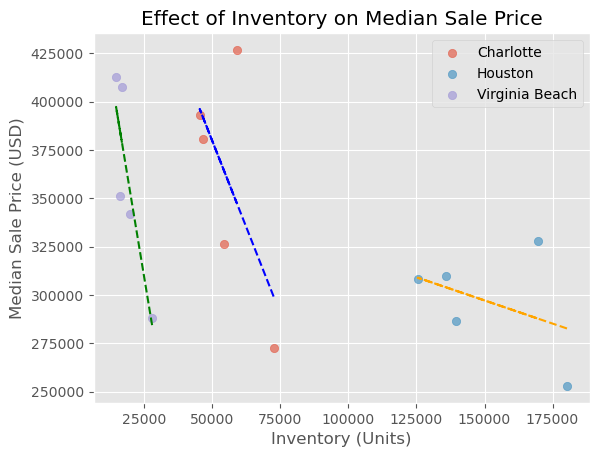

In [38]:
# Scatter plot for inventory vs. median sale price for each city
plt.scatter(merged_city_data['charlotte_inventory'], merged_city_data['charlotte_sale_price'], alpha=0.6, label='Charlotte')
plt.scatter(merged_city_data['houston_inventory'], merged_city_data['houston_sale_price'], alpha=0.6, label='Houston')
plt.scatter(merged_city_data['virginia_beach_inventory'], merged_city_data['virginia_beach_sale_price'], alpha=0.6, label='Virginia Beach')

# Add titles and labels
plt.title('Effect of Inventory on Median Sale Price')
plt.xlabel('Inventory (Units)')
plt.ylabel('Median Sale Price (USD)')
plt.legend()

# Optional: Add a trendline for each city
def add_trendline(x, y, color):
    z = np.polyfit(x, y, 1)  # Fit a linear trendline (degree=1)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--', color=color)

add_trendline(merged_city_data['charlotte_inventory'], merged_city_data['charlotte_sale_price'], 'blue')
add_trendline(merged_city_data['houston_inventory'], merged_city_data['houston_sale_price'], 'orange')
add_trendline(merged_city_data['virginia_beach_inventory'], merged_city_data['virginia_beach_sale_price'], 'green')

plt.show()